In [1]:
# to handle datasets
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_survey = pd.read_csv('./data/survey_results_public_2018.csv')

In [4]:
#preview basic data
df_survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [5]:
# get basic stats of data set
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


Question 1: Does open source contributing developers earn more?

In [39]:
df_survey.groupby(['OpenSource']).mean()['ConvertedSalary'].sort_values().dropna()

OpenSource
No      91455.874948
Yes    101253.591727
Name: ConvertedSalary, dtype: float64

Question 2: What is the country distribution of open-source contribution developers?

Question 3: Which country has the highest number of developers contributing to open source projects?

In [17]:
df_opensource=df_survey[df_survey.OpenSource=='Yes'].copy() #create temporary dataset for opensource contributers

df_opensource['Country'].value_counts()*100/len(df_opensource.index) #calculate percentages

United States                            20.533352
India                                    16.026087
Germany                                   6.786427
United Kingdom                            5.732721
Canada                                    3.096133
Russian Federation                        2.571601
France                                    2.550713
Brazil                                    2.376642
Australia                                 2.112055
Netherlands                               2.002971
Poland                                    1.826579
Spain                                     1.599127
Italy                                     1.478438
Pakistan                                  1.299726
China                                     1.188321
Turkey                                    1.172074
Iran, Islamic Republic of...              1.160470
Sweden                                    1.125656
Switzerland                               1.072274
Ukraine                        

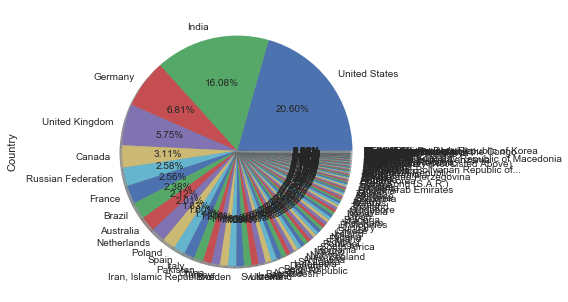

In [24]:
df_plot=df_opensource['Country'].value_counts() # create plot table

# set plot area
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

df_plot.plot(kind="pie", shadow=True,autopct='%1.2f%%') # show

--> when looking at the table above most opensource contributing country is United States

Question 4: What is the ratio of males and females for opensource contributors in Turkey?

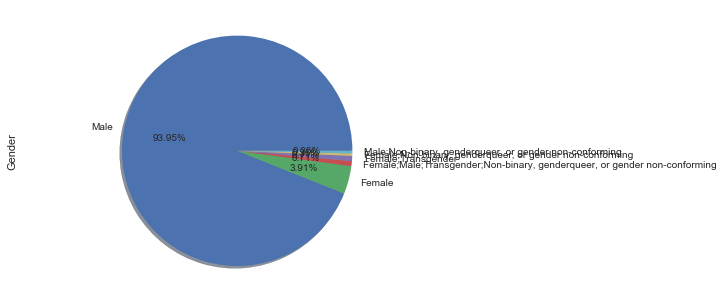

In [33]:

df_turkey=df_opensource.query("Country=='Turkey'") # create temporary data set filtered for Turkey

df_plot=df_turkey["Gender"].value_counts() # create result

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')

df_plot.plot(kind="pie", shadow=True,autopct='%1.2f%%') # show actually

--> As shown in the plot male develeoper are very dominant

Question 5: What is the average salary in eastern and western countries for opensource contributors?

In [34]:
# create a new column indicating western or eastern

list_western = ['United States', 'Liechtenstein', 'Switzerland', 
           'Iceland', 'Norway', 'Israel', 'Denmark', 
           'Ireland', 'Canada', 'United Kingdom', 'Germany', 
           'Netherlands', 'Sweden', 'Luxembourg', 'Austria', 
           'Finland', 'France', 'Belgium', 'Spain', 'Italy',
           'Poland']

list_eastern = ['Thailand', 'Singapore', 'Hong Kong', 
           'South Korea', 'Japan', 'China', 
           'Taiwan', 'Malaysia', 'India', 
           'Indonesia', 'Vietnam']
    
#Add a new column seperating to western and eastern
df_opensource['western_vs_eastern'] = df_opensource['Country'].apply(lambda x: 'western' if x in list_western else ('eastern' if x in list_eastern else 'other'))

In [35]:
# preview
df_opensource['western_vs_eastern'].value_counts()

western    22702
other      11955
eastern     8429
Name: western_vs_eastern, dtype: int64

In [36]:
df_opensource.groupby(['western_vs_eastern']).mean()['ConvertedSalary'].sort_values().dropna()

western_vs_eastern
eastern     35685.102987
other       58996.703835
western    128198.891287
Name: ConvertedSalary, dtype: float64